In [70]:
from autoencoder import Autoencoder
from SINDY import sindy_library_tf
from HIFF import generate_training_sat
import matplotlib.pyplot as plt
from typing import List, Optional
import tensorflow as tf


In [2]:
# generate the trainig set 
print("[INFO] generating trainnig dataset...")
(trainX, trainY) = generate_training_sat(32, 100)

# generate the test set 
print("[INFO] generating testing dataset...")
(testX, testY) = generate_training_sat(32,20)

[INFO] generating trainnig dataset...
[INFO] generating testing dataset...


In [34]:
tmp = tf.keras.initializers.RandomNormal
tmp(stddev=0.01)

In [37]:
tf.keras.initializers.RandomNormal(stddev=0.01).__class__
tf.keras.initializers.RandomNormal(stddev=0.01).__dir__()

['mean',
 'stddev',
 'seed',
 '_random_generator',
 '__module__',
 '__doc__',
 '__init__',
 '__call__',
 'get_config',
 '_keras_api_names',
 '_keras_api_names_v1',
 'from_config',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [99]:

tmp = tf.keras.initializers.RandomNormal(stddev=0.01)#.__init__(stddev=0.01)
tmp.__class__(**tmp.get_config()) == tmp 

False

{'mean': 0.0, 'stddev': 0.01, 'seed': None}

kwargs default params:  dict_keys(['name'])
[{}, {}]
{'l1': 0.0, 'l2': 0.0, 'dropout': 0.0, 'activation': 'tanh', 'kernel_initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x7fd08dbdc940>, 'bias_initializer': <keras.initializers.initializers_v2.Zeros object at 0x7fd08dbdc9e8>}
end this shit
Layer params form encoder: 
[{'l1': 0.0, 'l2': 0.0, 'dropout': 0.0, 'activation': 'tanh', 'kernel_initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x7fd08dbdc940>, 'bias_initializer': <keras.initializers.initializers_v2.Zeros object at 0x7fd08dbdc9e8>}, {'l1': 0.0, 'l2': 0.0, 'dropout': 0.0, 'activation': 'tanh', 'kernel_initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x7fd08dbdc940>, 'bias_initializer': <keras.initializers.initializers_v2.Zeros object at 0x7fd08dbdc9e8>}]
[{'l1': 0.0, 'l2': 0.0, 'dropout': 0.0, 'activation': 'tanh', 'kernel_initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x7fd08dbdc940>

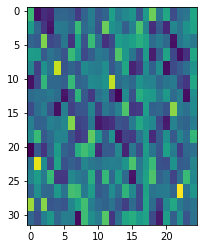

In [113]:
epochs = 20
batch_size = 3
# "layers_params" : [{"l1": 0.001, "l2" : 0.0, "dropout" : 0.2}, {"l1" : 0.001}],

model = Autoencoder([32, 25], ekwargs = {
        "name" : "fucku",
        "layers_params" : [{"l1": 0.001, "l2" : 0.0, "dropout" : 0.2}, {"l1" : 0.001}],
        'layers_default_params' : {
        'l1' : 0.001, 
        'l2' : 0.0, 
        'dropout' : 0.2, 
        'activation' : "tanh",
        'kernel_initializer' : tf.keras.initializers.RandomNormal(stddev=0.01),
        'bias_initializer' : tf.keras.initializers.Zeros()
        },
})
model.build_graph().summary()
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
        loss="mse")

model.fit(trainY, trainY, 
epochs = epochs, 
batch_size = batch_size, 
verbose = 1)

plt.imshow(model.encoder.weights[0].numpy())

In [110]:
#model.encoder.layers[2].__dir__()
model.encoder.layers[2].get_config() #_activity_regularizer

{'name': 'fucku_0',
 'trainable': True,
 'dtype': 'float32',
 'units': 25,
 'activation': 'tanh',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'RandomNormal',
  'config': {'mean': 0.0, 'stddev': 0.01, 'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': {'class_name': 'L1L2',
  'config': {'l1': 0.0010000000474974513, 'l2': 0.0}},
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

/usr/local/lib/python3.6/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                825       
_________________________________________________________________
dense_transpose_2 (DenseTran (None, 32)                857       
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
34/34 [==============================] - 1s 3ms/step - loss: 0.3060
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 0.2485
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 0.2101
Epoch 4/20
34/34 [====

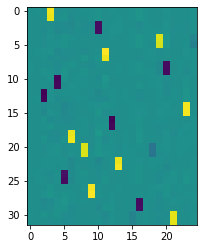

In [14]:
from shallowNet.shallowNet import shallowNet
model2 = shallowNet.build()
model2.fit(
    trainY, trainY,
    epochs = epochs, 
    batch_size = batch_size,
)
plt.imshow(model2.weights[0])

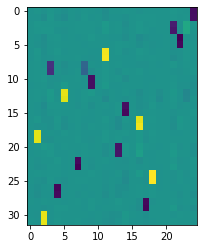

In [ ]:
def suplement_layers_params([32,25], [{"l1": 0.001, "l2" : 0.0, "dropout" : 0.2}, {"l1" : 0.001}], ) -> dict:


In [ ]:
        "layers_params" : [{"l1": 0.001, "l2" : 0.0, "dropout" : 0.2}, {"l1" : 0.001}],
        'layers_default_params' : {
        'l1' : 0.001, 
        'l2' : 0.0, 
        'dropout' : 0.2, 
        'activation' : "tanh",
        'kernel_initializer' : tf.keras.initializers.RandomNormal(stddev=0.01),
        'bias_initializer' : tf.keras.initializers.Zeros()
        },

In [111]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input, Dropout
from typing import List, Optional

def suplement_layers_params(architecture : List[int], layers_params : List[dict], layers_default_params : dict) -> dict:
    # add empty dicionaries to layers_params to corecponds to the encoding_layers_size size
    for _ in range(len(architecture) - len(layers_params)):
        layers_params.append({})
    return [{**layers_default_params, **x} for x in layers_params]

class DenseTranspose(tf.keras.layers.Layer):
    """
    Dense transpose layer from dense layer
    """
    def __init__(self, dense, activation = None, **kwargs):
        self.dense = dense 
        self.activation = tf.keras.activations.get(activation)
        super(DenseTranspose, self).__init__(**kwargs)
    def build(self, batch_input_shape):
        self.b = self.add_weight(name= "bias", shape = [ self.dense.input_shape[-1]], initializer = "zeros")
        self.w = self.dense.weights[0]
        super().build(batch_input_shape)
        
        
    def call(self, inputs):
        z = tf.linalg.matmul(inputs, self.w, transpose_b = True)
        return self.activation(z + self.b)
    
    def get_weights(self):
        return {"w": np.shape(tf.transpose(self.w))}    
    @property 
    def weights_transpose(self):
        return tf.transpose(self.dense.weights[0])


class Encoder(tf.keras.layers.Layer):
    """
    Encoder

    isFirstInputLayer - use input dimension only in Input Layer
    Kernel and bias are initialize by fresh instances of objects
    """
    def __init__(self, 
    widths : List[int] = [32,24], 
    isFirstInputLayer : Optional[bool] = True,
    layers_params : Optional[List[dict]] = [{}],
    layers_default_params : dict = {
        'l1' : 0.001, 
        'l2' : 0.0, 
        'dropout' : 0.2, 
        'activation' : "tanh",
        'kernel_initializer' : tf.keras.initializers.GlorotUniform(),
        'bias_initializer' : tf.keras.initializers.Zeros()
        },
    **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.latent_dim = widths[-1]
        self.input_dim = widths[0]
        self.layers = []
        
        if not ("name" in kwargs.keys()):
            kwargs["name"] = "encoder"

        
        print("kwargs default params: ", kwargs.keys())
        print(layers_params)
        print(layers_default_params)
        print("end this shit")
        layers_params = suplement_layers_params(widths, layers_params, layers_default_params)
        print("Layer params form encoder: \n{}".format(layers_params))
        for (layer_index, layer_dim), layer_params_ in zip(
            enumerate(widths[1:] if isFirstInputLayer else widths), 
            layers_params):

            if layer_params_["dropout"] > 0.0:
                self.layers.append(Dropout(
                    layer_params_["dropout"],
                    name = kwargs["name"] + "_{}_dropout".format(layer_index)
                    ))
            # construct encoder layer 
            self.layers.append(Dense(
                    units = layer_dim,
                    activation= layer_params_["activation"],
                    kernel_initializer= layer_params_["kernel_initializer"].__class__(**layer_params_["kernel_initializer"].get_config()),
                    bias_initializer= layer_params_["bias_initializer"].__class__(**layer_params_["bias_initializer"].get_config()),
                    kernel_regularizer = tf.keras.regularizers.L1L2(
                        l1=layer_params_["l1"], 
                        l2=layer_params_["l2"]),
                    name = kwargs["name"] + "_{}".format(layer_index)))
        
        print(layers_params)

    def call(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x


    def build_graph(self):
        x = Input(shape=(self.input_dim, ), name = 'encoder_input')
        return tf.keras.Model(inputs = [x], outputs = self.call(x))


class Decoder(tf.keras.layers.Layer):
    """
    Decoder

    isTranspose - use transposed layers from encoder. If False create fresh layers of the same size of encoder
    """

    """
    Add decoder documentation.
    """
    def __init__(self, 
    encoder : Encoder, 
    isTranspose : Optional[bool] = True,  
    layers_params : Optional[List[dict]] = [],
    layers_default_params : dict = {
        'l1' : 0.0, 
        'l2' : 0.0,
        'dropout' : 0.0, 
        'activation' : "tanh",
        'kernel_initializer' : tf.keras.initializers.GlorotUniform(),
        'bias_initializer' : tf.keras.initializers.Zeros()
        }, 
    **kwargs):

        super(Decoder, self).__init__(**kwargs)
        self.input_dim = encoder.weights[0].shape[-1]
        self.output_dim = encoder.weights[-1].shape[-1]
        self.layers = []

        if not ("name" in kwargs.keys()):
            kwargs["name"] = "decoder"

        layers_params = suplement_layers_params([x for x in encoder.layers[1:][::-1] if type(x) == Dense], layers_params, layers_default_params)

        if isTranspose:
            for layer_index, layer in enumerate([x for x in encoder.layers[1:][::-1] if type(x) == Dense]):
                self.layers.append(
                    DenseTranspose(
                        dense = layer,
                        name = kwargs["name"] + "_{}".format(layer_index)
                        )
                    )
        else:        
            for (layer_index, layer_dim), layer_params_ in zip(
                enumerate([x.input_shape[-1] for x in encoder.layers][1:][::-1]), 
                layers_params):
                
                if layer_params_["dropout"] > 0.0:
                    self.layers.append(Dropout(
                        layer_params_["dropout"],
                        name = kwargs["name"] + "_{}_dropout".format(layer_index)
                        ))

                self.layers.append(Dense(
                    units = layer_dim,
                    activation= layer_params_["activation"],
                    kernel_initializer= layer_params_["kernel_initializer"].__class__(**layer_params_["kernel_initializer"].get_config()),
                    bias_initializer= layer_params_["bias_initializer"].__class__(**layer_params_["bias_initializer"].get_config()),
                    kernel_regularizer = tf.keras.regularizers.L1L2(
                        l1=layer_params_["l1"], 
                        l2=layer_params_["l2"]),
                    name = kwargs["name"] + "_{}".format(layer_index)))
    
        print(layers_params)
    """
    Add privileged training: training = None 
    """
    def call(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x


    def build_graph(self):
        x = Input(shape=(self.output_dim, ), name = 'decoder_input')
        return tf.keras.Model(inputs = [x], outputs = self.call(x))

    """
    Overtide this method to enable serialization 
    """
    def get_config(self):
        pass

class Autoencoder(tf.keras.Model):
    """
    Autoencoder
    Stack both encoder and decoder
    """
    def __init__(self, 
    widths : List[int] = [32,28,25], 
    name : Optional[str] = "autoencoder", 
    ekwargs : Optional[dict] = {}, 
    dkwargs : Optional[dict] = {}, 
    **kwargs):
        if not ("name" in kwargs.keys()):
            kwargs["name"] = "autoencoder"

        super(Autoencoder, self).__init__(**kwargs)
        self.input_dim = widths[0]
        self.latent_dim = widths[-1]
        self.encoder = Encoder(widths, **ekwargs).build_graph()
        self.decoder = Decoder(self.encoder, **dkwargs).build_graph()
    
    def call(self, input):        
        x = self.encoder.layers[1](input)
        for layer in self.encoder.layers[2:] + self.decoder.layers[1:]:
            x = layer(x)
        return x
        
    
    def compile(self, **kwargs):
        super(Autoencoder, self).compile(**kwargs)

    def build_graph(self,):
        x = Input(shape=(self.input_dim, ), name = 'autoencoder_input')
        return tf.keras.Model(inputs = [x], outputs = self.call(x))

    def encode(self, input):
        return self.encoder(input)
    
    def decode(self, input):
        return self.decoder(input)

    def get_input_dim(self) -> int:
        return self.input_dim
    
    def get_latent_dim(self) -> int:
        return self.latent_dim
